# 1. Data Preprocessing
Dataset yang digunakan berasal dari kaggle.com yaitu https://www.kaggle.com/uciml/pima-indians-diabetes-database. Variabel yang digunakan adalah

- Pregnancies : Number of times pregnant
- Glucose : Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure : Diastolic blood pressure (mm Hg)
- SkinThickness :Triceps skin fold thickness (mm)
- Insulin : 2-Hour serum insulin (mu U/ml)
- BMI : Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction : Diabetes pedigree function
- Age : Age (years)
- Outcome : Class variable (0 or 1) 268 of 768 are 1, the others are 0

In [1]:
# install.packages('caTools')

In [4]:
library(dplyr)
library(caTools)
set.seed(123)

## 1.1 Import Datasets

In [5]:
#getwd()

In [6]:
loc = '/home/jovyan/work/github/Artificial-Intelligence/Supervised Learning/Decision Tree/Diabetes Data Case/Diabetes.csv'

In [7]:
df = read.csv(loc)

In [8]:
head(df)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0


## 1.2 Split datasets

In [9]:
# membuat kolom baru yaitu status
df$status <- sample.split(df[,9],SplitRatio = 0.80) 

In [10]:
df$Outcome <- as.factor(df$Outcome)

In [11]:
df_train = subset(df,status==TRUE) # label TRUE = data train
df_test = subset(df,status==FALSE) # label FALSE = data test

In [12]:
head(df_train)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,status
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<fct>,<lgl>
1,6,148,72,35,0,33.6,0.627,50,1,TRUE
2,1,85,66,29,0,26.6,0.351,31,0,TRUE
3,8,183,64,0,0,23.3,0.672,32,1,TRUE
4,1,89,66,23,94,28.1,0.167,21,0,TRUE
5,0,137,40,35,168,43.1,2.288,33,1,TRUE
8,10,115,0,0,0,35.3,0.134,29,0,TRUE


In [13]:
kolom_X = c('Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age')
kolom_y = c('Outcome')

In [14]:
X_train = df_train[,kolom_X]
X_test = df_test[,kolom_X]
y_train = df_train[,kolom_y]
y_test = df_test[,kolom_y]

## 2. Modeling

In [15]:
# install.packages('C50')

In [16]:
library(C50)
tree_mod <- C5.0(x = X_train, y = y_train)
tree_mod


Call:
C5.0.default(x = X_train, y = y_train)

Classification Tree
Number of samples: 614 
Number of predictors: 8 

Tree size: 35 

Non-standard options: attempt to group attributes


In [17]:
summary(tree_mod)


Call:
C5.0.default(x = X_train, y = y_train)


C5.0 [Release 2.07 GPL Edition]  	Sat May 13 14:58:05 2023
-------------------------------

Class specified by attribute `outcome'

Read 614 cases (9 attributes) from undefined.data

Decision tree:

Glucose > 143:
:...Glucose > 161: 1 (80/12)
:   Glucose <= 161:
:   :...DiabetesPedigreeFunction <= 0.332: 0 (20/5)
:       DiabetesPedigreeFunction > 0.332:
:       :...Age > 44: 1 (12)
:           Age <= 44:
:           :...Glucose > 155: 1 (7)
:               Glucose <= 155:
:               :...SkinThickness <= 8: 0 (3)
:                   SkinThickness > 8:
:                   :...Glucose > 152: 0 (6/1)
:                       Glucose <= 152:
:                       :...Age > 33: 1 (7)
:                           Age <= 33:
:                           :...DiabetesPedigreeFunction <= 0.371: 1 (3)
:                               DiabetesPedigreeFunction > 0.371: 0 (5/1)
Glucose <= 143:
:...BMI <= 26.2: 0 (121/5)
    BMI > 26.2:
    :...Gluco

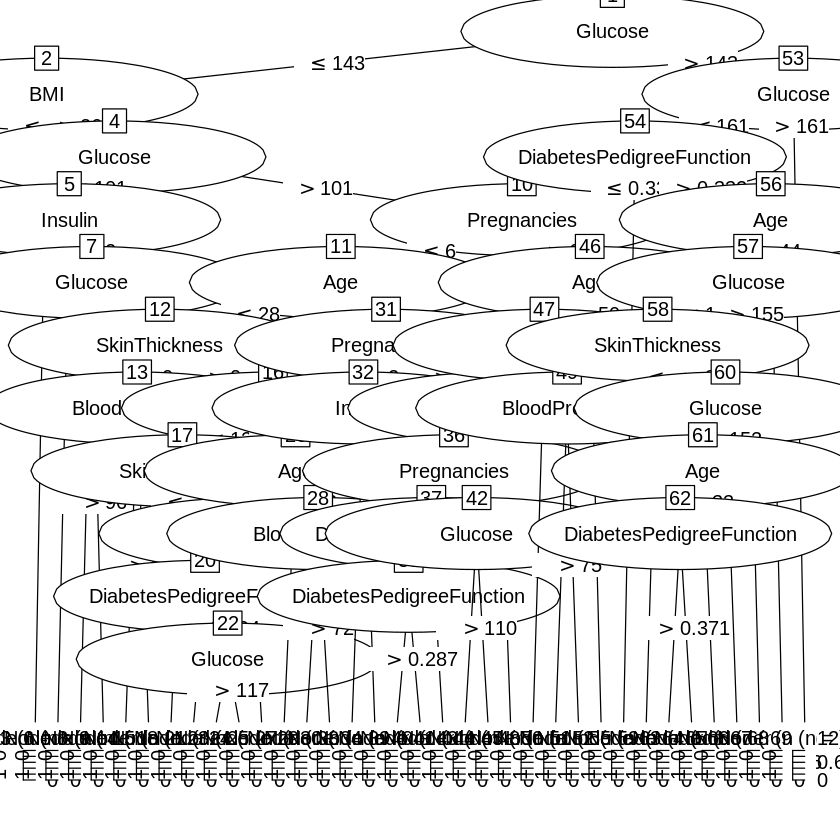

In [18]:
plot(tree_mod)

In [19]:
tree_boost <- C5.0(x = X_train, y = y_train, trials = 3)
summary(tree_boost)


Call:
C5.0.default(x = X_train, y = y_train, trials = 3)


C5.0 [Release 2.07 GPL Edition]  	Sat May 13 15:04:15 2023
-------------------------------

Class specified by attribute `outcome'

Read 614 cases (9 attributes) from undefined.data

-----  Trial 0:  -----

Decision tree:

Glucose > 143:
:...Glucose > 161: 1 (80/12)
:   Glucose <= 161:
:   :...DiabetesPedigreeFunction <= 0.332: 0 (20/5)
:       DiabetesPedigreeFunction > 0.332:
:       :...Age > 44: 1 (12)
:           Age <= 44:
:           :...Glucose > 155: 1 (7)
:               Glucose <= 155:
:               :...SkinThickness <= 8: 0 (3)
:                   SkinThickness > 8:
:                   :...Glucose > 152: 0 (6/1)
:                       Glucose <= 152:
:                       :...Age > 33: 1 (7)
:                           Age <= 33:
:                           :...DiabetesPedigreeFunction <= 0.371: 1 (3)
:                               DiabetesPedigreeFunction > 0.371: 0 (5/1)
Glucose <= 143:
:...BMI <= 26.2: 0 (

# Rule-Based Models

In [20]:
rule_mod <- C5.0(x = X_train, y = y_train, rules = TRUE)
rule_mod


Call:
C5.0.default(x = X_train, y = y_train, rules = TRUE)

Rule-Based Model
Number of samples: 614 
Number of predictors: 8 

Number of Rules: 16 

Non-standard options: attempt to group attributes


In [21]:
summary(rule_mod)


Call:
C5.0.default(x = X_train, y = y_train, rules = TRUE)


C5.0 [Release 2.07 GPL Edition]  	Sat May 13 15:04:50 2023
-------------------------------

Class specified by attribute `outcome'

Read 614 cases (9 attributes) from undefined.data

Rules:

Rule 1: (121/5, lift 1.5)
	Glucose <= 143
	BMI <= 26.2
	->  class 0  [0.951]

Rule 2: (167/10, lift 1.4)
	Glucose <= 101
	Insulin <= 142
	->  class 0  [0.935]

Rule 3: (240/50, lift 1.2)
	Glucose <= 161
	DiabetesPedigreeFunction <= 0.332
	->  class 0  [0.789]

Rule 4: (444/105, lift 1.2)
	Glucose <= 155
	Age <= 44
	->  class 0  [0.762]

Rule 5: (13, lift 2.7)
	Glucose > 143
	Glucose <= 152
	SkinThickness > 8
	DiabetesPedigreeFunction > 0.332
	Age > 33
	->  class 1  [0.933]

Rule 6: (12, lift 2.7)
	Glucose > 143
	Glucose <= 161
	DiabetesPedigreeFunction > 0.332
	Age > 44
	->  class 1  [0.929]

Rule 7: (8, lift 2.6)
	Glucose > 155
	Glucose <= 161
	DiabetesPedigreeFunction > 0.332
	->  class 1  [0.900]

Rule 8: (6, lift 2.5)
	Glucose > 143


# Predictions

In [24]:
predict(rule_mod, newdata = X_test[1:3,])

[1] 0 0 1
Levels: 0 1

In [25]:
predict(tree_boost, newdata = X_test[1:3,], type = "prob")

,0,1
6,0.7480407,0.2519593
7,1.0000000,0.0000000
9,0.2693526,0.7306474


# Cost-Sensitive Models

In [30]:
cost_mat <- matrix(c(0, 2, 1, 0), nrow = 2)
rownames(cost_mat) <- colnames(cost_mat) <- c(1, 0)
cost_mat

,1,0
1,0,1
0,2,0


In [31]:
cost_mod <- C5.0(x = X_train, y = y_train, 
                 costs = cost_mat)
summary(cost_mod)


Call:
C5.0.default(x = X_train, y = y_train, costs = cost_mat)


C5.0 [Release 2.07 GPL Edition]  	Sat May 13 15:09:17 2023
-------------------------------

Class specified by attribute `outcome'

Read 614 cases (9 attributes) from undefined.data
Read misclassification costs from undefined.costs

Decision tree:

Glucose > 143:
:...Glucose > 161: 1 (80/12)
:   Glucose <= 161:
:   :...DiabetesPedigreeFunction <= 0.332:
:       :...SkinThickness > 27: 0 (6)
:       :   SkinThickness <= 27:
:       :   :...BMI > 36.3: 1 (2)
:       :       BMI <= 36.3:
:       :       :...BloodPressure <= 24: 1 (1)
:       :           BloodPressure > 24:
:       :           :...BloodPressure > 85: 1 (1)
:       :               BloodPressure <= 85:
:       :               :...Insulin <= 272: 0 (8)
:       :                   Insulin > 272: 1 (2/1)
:       DiabetesPedigreeFunction > 0.332:
:       :...Age > 44: 1 (12)
:           Age <= 44:
:           :...Glucose > 155: 1 (7)
:               Glucose <= 155

# Reference
- https://cran.r-project.org/web/packages/C50/vignettes/C5.0.html